<a href="https://colab.research.google.com/github/Rishitha2610/IIIT_AIML/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

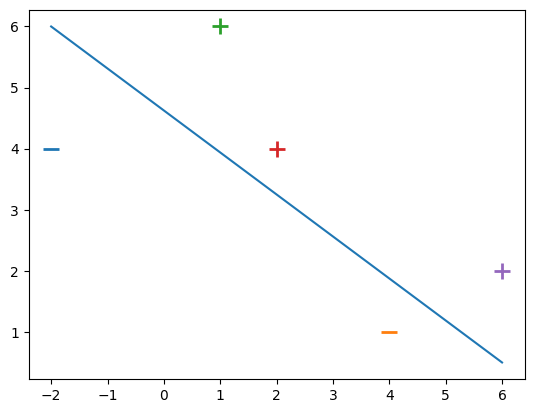

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

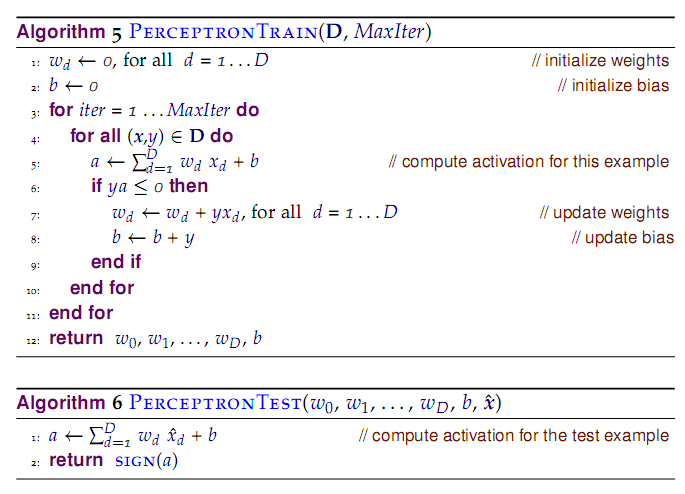

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

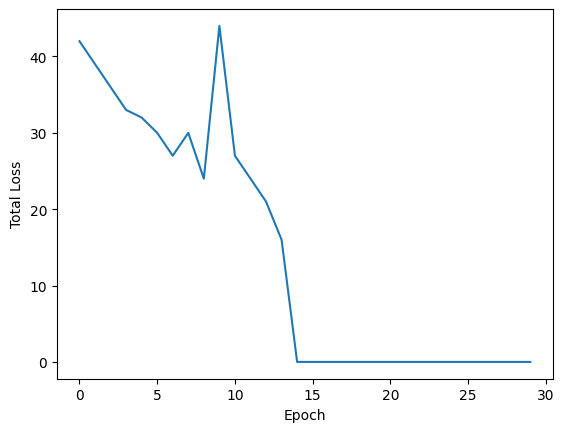

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

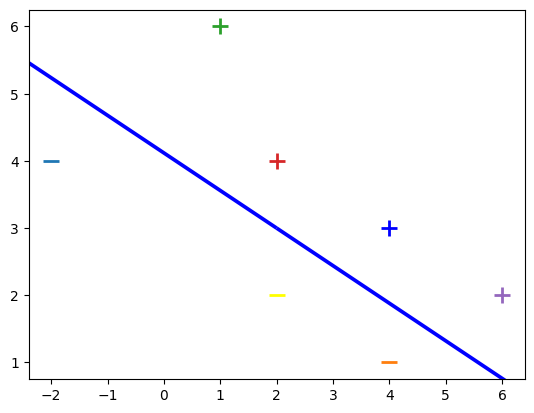

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



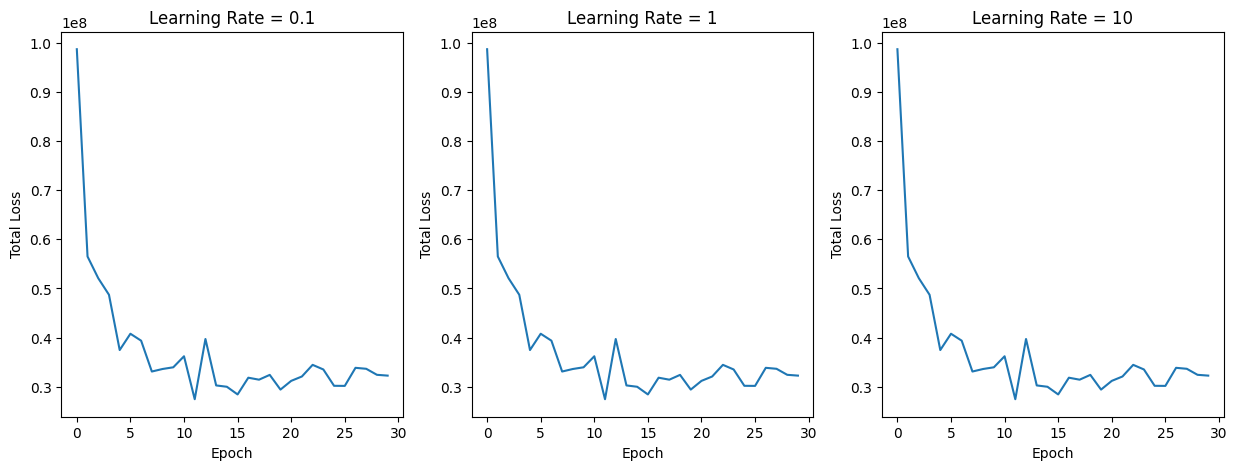

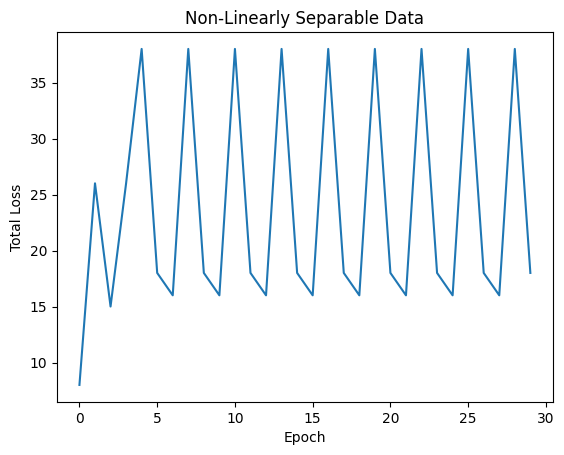

In [10]:
#1 Answer

from sklearn import datasets
from sklearn.model_selection import train_test_split

# 1. Load a real dataset (example: Breast Cancer dataset)
data = datasets.load_breast_cancer()
X_real = data.data
y_real = np.where(data.target == 0, -1, 1)  # Convert 0,1 labels to -1,1

# 2. Apply perceptron algorithm with different learning rates
learning_rates = [0.1, 1, 10]
plt.figure(figsize=(15, 5))

for i, eta in enumerate(learning_rates):
    plt.subplot(1, len(learning_rates), i + 1)
    weights = perceptron_algo_plot(X_real, y_real)
    plt.title(f'Learning Rate = {eta}')

# 3. Apply perceptron to a non-linearly separable dataset
# (you can create a simple example where the classes overlap)

non_linear_data = np.array([
    [1, 1, -1],
    [2, 2, -1],
    [2, 1, -1],
    [3, 3, -1],
    [3, 2, -1],
    [4, 4, 1],
    [5, 5, 1],
    [5, 4, 1],
    [6, 6, 1],
    [6, 5, 1]
])

X_non_linear = non_linear_data[:, :-1]
y_non_linear = non_linear_data[:, -1]

plt.figure()
perceptron_algo_plot(X_non_linear, y_non_linear)
plt.title('Non-Linearly Separable Data')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


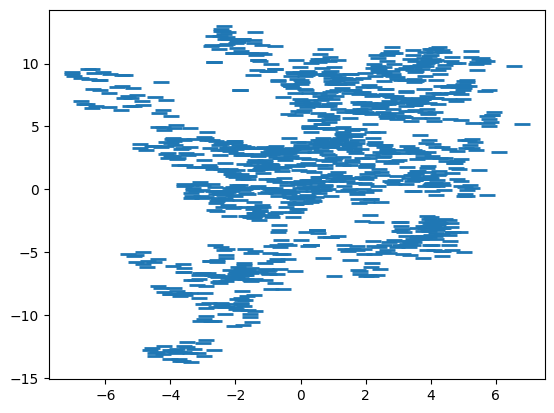

array([15.146626,  6.097601, -2.644033,  8.56724 ])

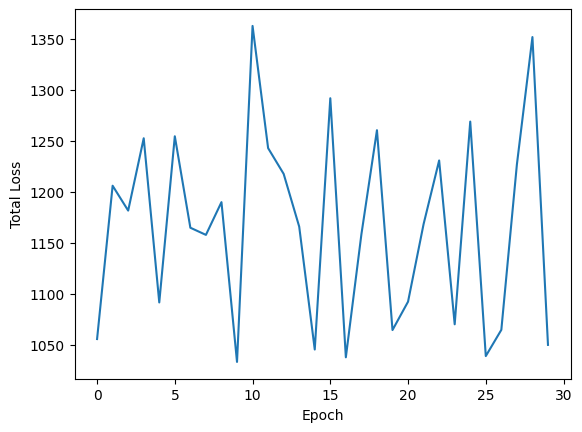

In [11]:
#Banknote Data set

from sklearn import datasets

# Load Banknote Dataset
banknote_data = datasets.fetch_openml(name='banknote-authentication', version=1, as_frame=True)
X = banknote_data.data.to_numpy()
y = (banknote_data.target == '0').astype(int) * 2 - 1  # Convert labels to -1 and 1

# Plot the data points
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], s=120, marker='_', linewidths=2)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=120, marker='+', linewidths=2)
plt.show()

# Run perceptron and plot errors
perceptron_algo_plot(X, y)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load Banknote Authentication dataset
data_banknote = datasets.fetch_openml(name="banknote-authentication", version=1, as_frame=True)
X_banknote = data_banknote.data.to_numpy()
y_banknote = np.where(data_banknote.target == '0', -1, 1)  # Convert 0,1 labels to -1,1



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
# Perceptron Algorithm
def perceptron_algo(X, y, learning_rate=0.01, epochs=100):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    errors = []

    for _ in range(epochs):
        error_count = 0
        for xi, target in zip(X, y):
            update = learning_rate * (target - np.dot(xi, weights))
            weights += update * xi
            error_count += int(update != 0.0)
        errors.append(error_count)

    return weights, errors

# Plotting function
def perceptron_algo_plot(X, y, learning_rate=0.01, epochs=100):
    weights, errors = perceptron_algo(X, y, learning_rate, epochs)
    plt.plot(errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of Misclassifications')
    plt.title('Perceptron Algorithm')
    plt.grid(True)
    return weights


<ipython-input-13-807c4e512b86>:10: RuntimeWarning: overflow encountered in double_scalars
  update = learning_rate * (target - np.dot(xi, weights))


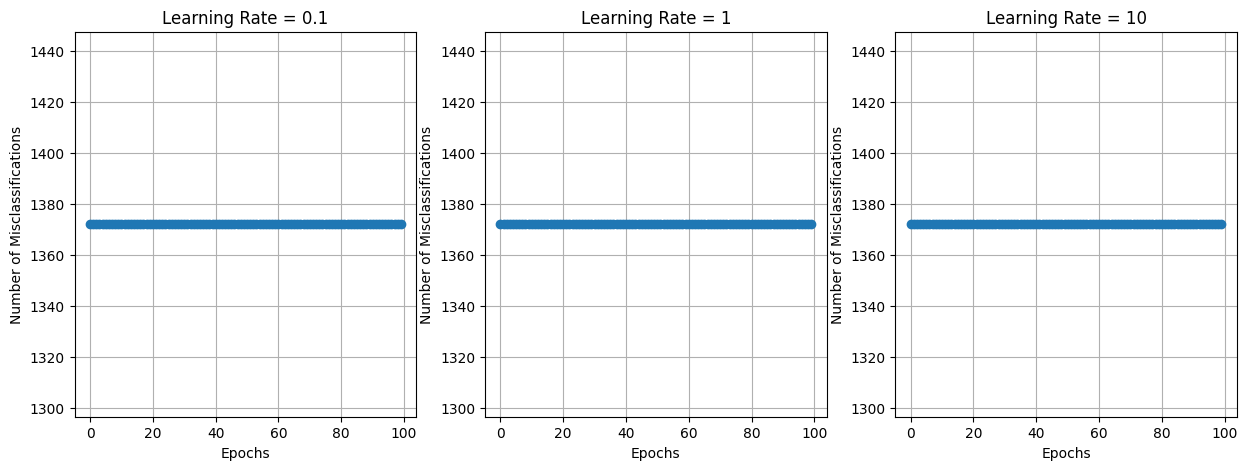

In [14]:
# Apply perceptron algorithm with different learning rates
learning_rates = [0.1, 1, 10]
plt.figure(figsize=(15, 5))

for i, eta in enumerate(learning_rates):
    plt.subplot(1, len(learning_rates), i + 1)
    weights = perceptron_algo_plot(X_banknote, y_banknote, learning_rate=eta)
    plt.title(f'Learning Rate = {eta}')



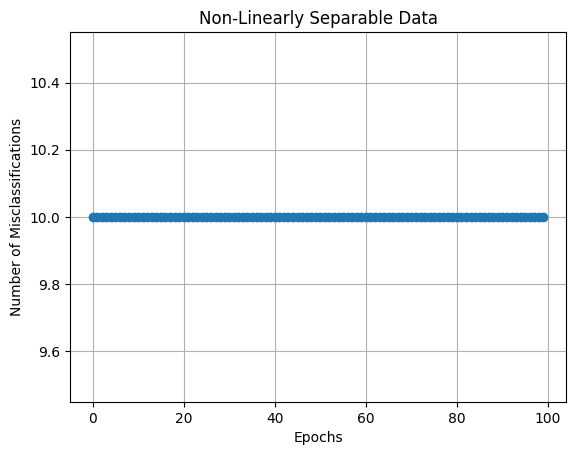

In [15]:
# Non-linearly separable dataset
non_linear_data = np.array([
    [1, 1, -1],
    [2, 2, -1],
    [2, 1, -1],
    [3, 3, -1],
    [3, 2, -1],
    [4, 4, 1],
    [5, 5, 1],
    [5, 4, 1],
    [6, 6, 1],
    [6, 5, 1]
])

X_non_linear = non_linear_data[:, :-1]
y_non_linear = non_linear_data[:, -1]

plt.figure()
perceptron_algo_plot(X_non_linear, y_non_linear)
plt.title('Non-Linearly Separable Data')

plt.show()


#Observations

1. Real Dataset:
We can visualize the error plot to observe how the total loss changes over epochs.

2. Learning Rate Adjustment:
Higher learning rates may lead to faster convergence, but they can also cause overshooting, making the algorithm diverge. Smaller learning rates may be more stable but may converge slower.


3. Non-Linearly Separable Dataset:
When trying the perceptron algorithm on a toy dataset that is not linearly separable. In such cases, the perceptron algorithm may not converge and will continue to update weights endlessly. We can observe this behavior in the error plot; it won't reach a stable minimum. Perceptron assumes that the data is linearly separable, and its performance on non-linearly separable data is limited.

In [16]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [17]:
y = np.array([-1, -1, 1, -1, -1])

[-0.05596181  0.1576227   0.89173997]


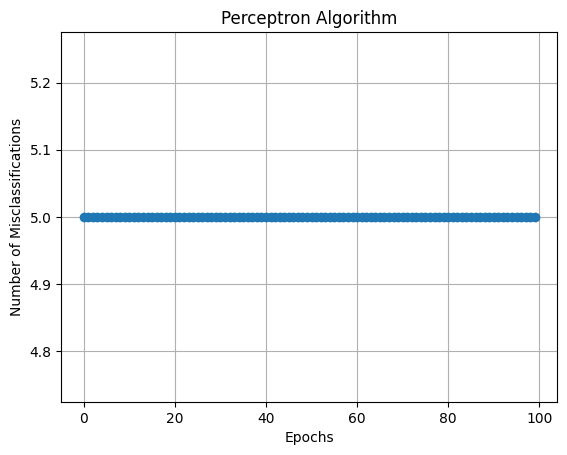

In [18]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.